<a href="https://colab.research.google.com/github/solar71830/Grouping/blob/main/grp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import prince
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
dane = pd.read_csv("Country-data.csv")
dane['country'] = pd.factorize(dane['country'])[0] + 1
scaler = MinMaxScaler()
nd = scaler.fit_transform(dane)
dane = pd.DataFrame(nd, columns=dane.columns)

dane.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.000000,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.006024,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.012048,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.018072,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.024096,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


In [ ]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity,calculate_kmo

In [ ]:
chi_sqaure_value,p_value=calculate_bartlett_sphericity(dane)
print(chi_sqaure_value,p_value)

1176.2686863978854 5.7451653608419994e-217


In [ ]:
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(dane)
print(f'Wynik testu chi2: {chi2}, p-wartość: {p}')

if p < 0.05:
    print("Istnieją zależności między zmiennymi, analiza korespondencji ma sens.")
else:
    print("Brak istotnych zależności między zmiennymi, analiza korespondencji może nie być właściwa.")

Wynik testu chi2: 195.83061414465107, p-wartość: 1.0
Brak istotnych zależności między zmiennymi, analiza korespondencji może nie być właściwa.


In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dane)

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
distance_matrix = euclidean_distances(scaled_data)

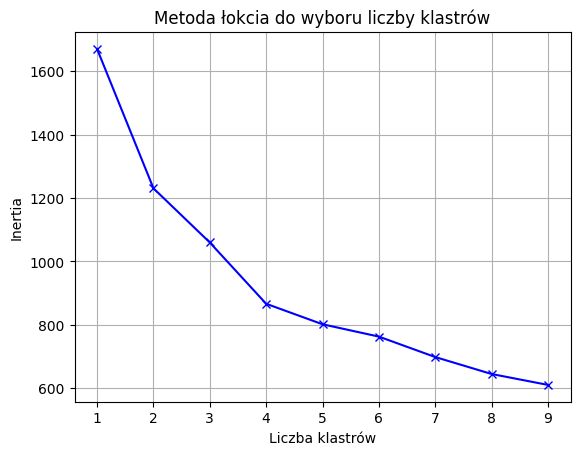

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Wykres łokcia
plt.plot(K, inertia, 'bx-')
plt.xlabel('Liczba klastrów')
plt.ylabel('Inertia')
plt.title('Metoda łokcia do wyboru liczby klastrów')
plt.grid(True)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=35)
kmeans_labels = kmeans.fit_predict(scaled_data)
dane['KMeans Cluster'] = kmeans_labels
print("Liczność klastrów K-means:\n", dane['KMeans Cluster'].value_counts())

Liczność klastrów K-means:
 KMeans Cluster
0    63
1    47
3    29
2    28
Name: count, dtype: int64


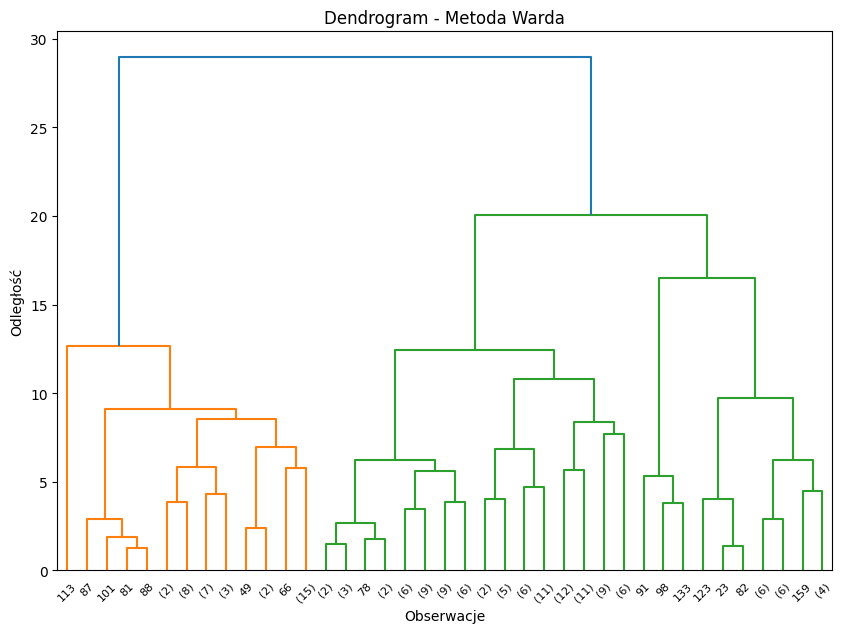

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Obliczanie macierzy linkage z metodą Warda
Z = linkage(scaled_data, method='ward')

# Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Dendrogram - Metoda Warda')
plt.xlabel('Obserwacje')
plt.ylabel('Odległość')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ward_model = AgglomerativeClustering(n_clusters=4, linkage='ward')
ward_labels = ward_model.fit_predict(scaled_data)
dane['Ward Cluster'] = ward_labels


print("Liczność klastrów - metoda Warda:\n", dane['Ward Cluster'].value_counts())

Liczność klastrów - metoda Warda:
 Ward Cluster
2    100
0     44
1     20
3      3
Name: count, dtype: int64


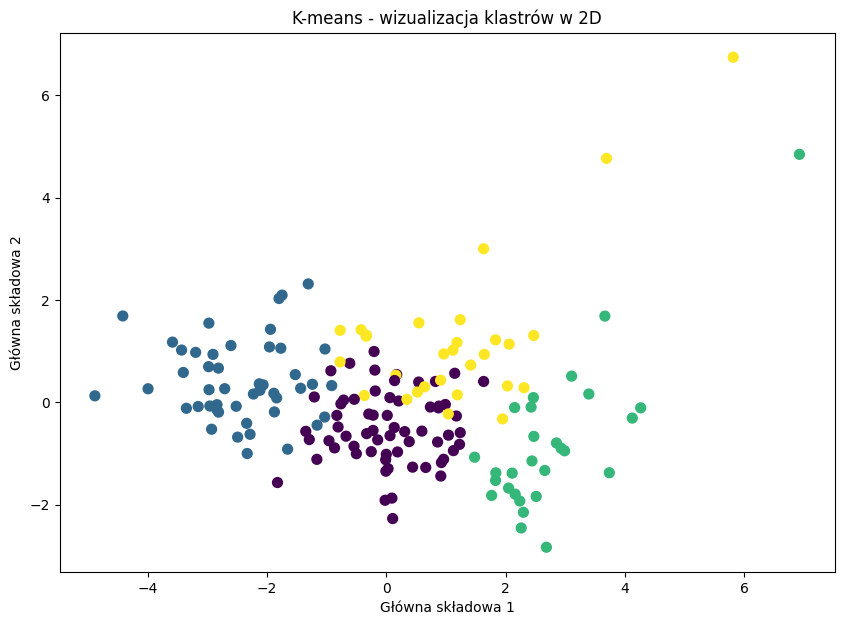

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('K-means - wizualizacja klastrów w 2D')
plt.xlabel('Główna składowa 1')
plt.ylabel('Główna składowa 2')
plt.show()

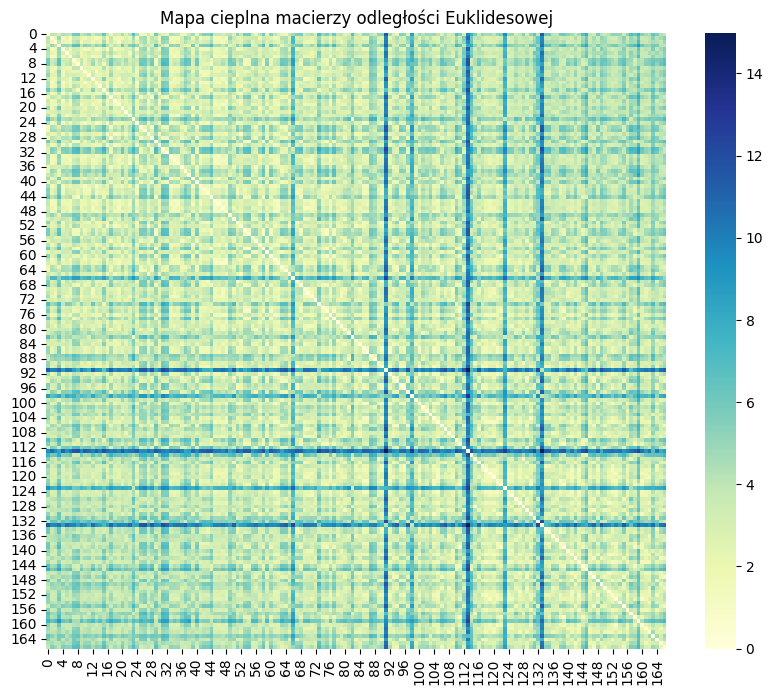

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(distance_matrix, cmap="YlGnBu")
plt.title("Mapa cieplna macierzy odległości Euklidesowej")
plt.show()

In [ ]:
dtxt = pd.read_csv("StudentPerformanceFactors.csv")
dtxt.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
